In [1]:
%pip install pandas numpy seaborn matplotlib scikit-learn


  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using

In [2]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
#import warnings 
# warnings.filterwarnings('ignore')

# Lista de Tarefas - Workflow
Com base no dataset "Wisconsin Breast Cancer" e nos objetivos de EDA e Pré-Processamento, aqui está um fluxo de trabalho estruturado, listando as etapas e tarefas essenciais, sem o código.

## Etapa 0   
### **Tarefa 0: Definir o Objetivo:** 
Formalizar o problema como uma **classificação binária**: prever se um tumor é Maligno ('M') ou Benigno ('B') com base nas medições fornecidas.


## Etapa 1: 
Compreensão e Carregamento dos Dados (Setup Inicial)**

### Tarefa 1.1: Carregar o Dataset: 
Importar os dados (provavelmente de um arquivo CSV) para um DataFrame do pandas.


In [4]:
data = pd.read_csv('data/data.csv', sep=',')
# Exibindo as primeiras linhas do DataFrame
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Tarefa 1.2: Visão Geral Inicial:
Realizar uma primeira inspeção para entender as dimensões do dataset (número de linhas e colunas) e os tipos de dados de cada coluna.



In [5]:
print("----------- Informações Gerais do DataFrame -----------")
print("\n-----------")
data.info()

print("----------- Estatísticas Descritivas -----------")
print("\n-----------")
print(data.describe().T)
print("\n-----------")
print(data.shape)
print("\n-----------")
print(data.columns)





----------- Informações Gerais do DataFrame -----------

-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se 

In [6]:

print("----------- Informações Valores Ausentes -----------")
print(data.isnull().sum())


----------- Informações Valores Ausentes -----------
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst   

## Etapa 2: Análise de Qualidade dos Dados (Data Quality Assessment)
### Tarefa 2.1: Verificar Valores Ausentes:
Inspecionar sistematicamente cada coluna em busca de valores nulos (NaN) ou placeholders. Identificar e quantificar o problema.
### Tarefa 2.2: Remover Colunas Irrelevantes:
Eliminar colunas que não contêm informação útil, como a coluna `id` (que é apenas um identificador) e a coluna `Unnamed: 32` (que está completamente vazia).


In [7]:
print("\n----------- Verificação de Nulos -----------")
print(f"Linhas Nulos: {data.isnull().sum()}")


----------- Verificação de Nulos -----------
Linhas Nulos: id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_w

</br>Chamou a atenção a coluna Unnamed:32
</br>Vamos adicionar um passo de confirmação para entender a dimensão do problema

In [8]:
# 
total_rows = len(data)
null_count_unnamed = data['Unnamed: 32'].isnull().sum()
percentage_null_unnamed = (null_count_unnamed / total_rows) * 100
print(f"Total de linhas: {total_rows}")
print(f"Total de valores ausentes na coluna 'Unnamed: 32': {null_count_unnamed}")
print(f"Porcentagem de valores ausentes na coluna 'Unnamed: 32': {percentage_null_unnamed:.2f}%")



Total de linhas: 569
Total de valores ausentes na coluna 'Unnamed: 32': 569
Porcentagem de valores ausentes na coluna 'Unnamed: 32': 100.00%


- Coluna 100% Nula (Unnamed: 32): A coluna Unnamed: 32 contém 569 valores ausentes.
- Impacto: Nulo para análise (já que não contém informação), mas prejudicial para a modelagem. A coluna adiciona ruído, ocupa memória e pode causar erros em pipelines de automação se não for tratada.

**Solução**: A solução para uma coluna 100% nula é direta e objetiva: removê-la. Manter uma coluna sem nenhuma informação não agrega valor à análise ou à modelagem.


In [9]:
print("colunas :", data.columns)

data_cleaned = data.drop(columns=['Unnamed: 32'])


print("colunas limpas :", data_cleaned.columns)

print(data_cleaned.isnull().sum().any())

colunas : Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
colunas limpas : Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
     

In [10]:
print("\n----------- Verificação de Inconsistências Categóricas -----------")
print(data_cleaned['diagnosis'].value_counts())
print(data_cleaned['diagnosis'].unique())


----------- Verificação de Inconsistências Categóricas -----------
diagnosis
B    357
M    212
Name: count, dtype: int64
['M' 'B']


Entemos que a coluna 'diagnosis' é consistente, sem valores diferentes do dominio

Excluir a coluna `id`

In [11]:
data_cleaned = data_cleaned.drop(columns=['id'])
print("colunas limpas :", data_cleaned.columns)


colunas limpas : Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Tarefa 2.3: Verificar Duplicatas:
Checar se existem linhas completamente duplicadas no dataset e decidir sobre a estratégia de remoção, se houver.

In [12]:
print("\n----------- Verificação de Duplicados -----------")
print(f"Linhas duplicadas: {data_cleaned.duplicated().sum()}")



----------- Verificação de Duplicados -----------
Linhas duplicadas: 0


C:\Users\c079563\AppData\Local\Temp\ipykernel_23396\1810491624.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis', order=['B', 'M'])


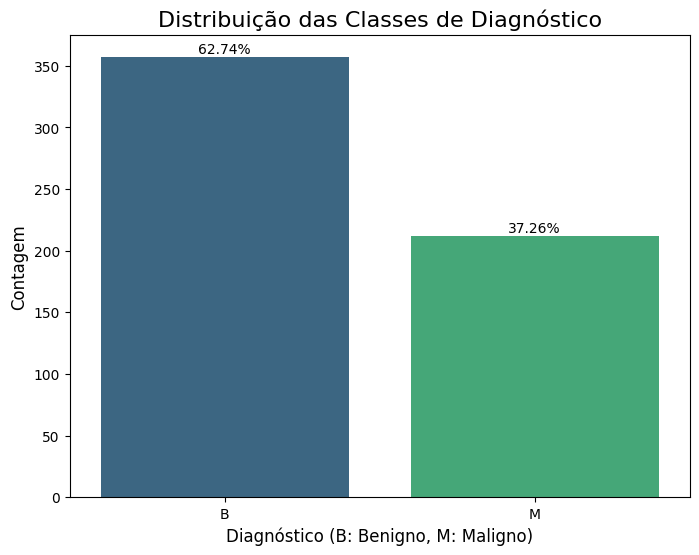

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Usar a paleta 'viridis' ou 'plasma' pode ser bom para contextos médicos
ax = sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis', order=['B', 'M']) 

# Adicionar os rótulos de porcentagem nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data_cleaned)*100),
            ha="center")

plt.title('Distribuição das Classes de Diagnóstico', fontsize=16)
plt.xlabel('Diagnóstico (B: Benigno, M: Maligno)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()